## Ranking of RTA incidences by year

In [27]:
import geopandas as gpd
from geopandas.tools import sjoin
import pandas as pd
import matplotlib.pyplot as plt
from fiona.crs import from_epsg
from descartes.patch import PolygonPatch

### Load and prepare RTA data

In [33]:
#Load file
data_df = pd.read_excel('accidents_2009_to_2014.xlsx')
#data_df.head()
print("Column headings:")
print(data_df.columns)

Column headings:
Index(['Accident_Index', 'Longitude', 'Latitude', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Year',
       'Month_num', 'Month_name', 'Day_num', 'Day_name', 'Time', 'Hour',
       'Local_Authority_(District)', 'Borough _name', 'Borough _name.1',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Control', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Year.1',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30'],
      dtype='object')


In [46]:
#Get list of London's boroughs
borough_names = data_df['Borough _name'].unique()
print("No. of boroughs:", len(borough_names))
for i in range(len(borough_names)):
    print(i+1, borough_names[i])

No. of boroughs: 32
1 Westminster
2 Camden
3 Islington
4 Hackney
5 Tower Hamlets
6 Greenwich
7 Lewisham
8 Southwark
9 Lambeth
10 Wandsworth
11 Hammersmith and Fulham
12 Kensington and Chelsea
13 Waltham Forest
14 Redbridge
15 Havering
16 Barking and Dagenham
17 Newham
18 Bexley
19 Bromley
20 Croydon
21 Sutton
22 Merton
23 Kingston upon Thames
24 Richmond upon Thames
25 Hounslow
26 Hillingdon
27 Ealing
28 Brent
29 Harrow
30 Barnet
31 Haringey
32 Enfield


In [71]:
#Get total counts of RTAs for each borough (from 2009-2014)

borough = []
rta = []

for i in borough_names:    
    count = 0
    for idx, row in data_df.iterrows():
        if row["Borough _name"] == i: 
            count +=1
    rta.append(count)
    borough.append(i)
    

In [134]:
type(borough)

list

In [148]:
#Create dataframe of total RTA count (2009-2014) by borought

total_rta = pd.DataFrame()
total_rta["NAME"] = borough
total_rta["total_rta"] = rta
total_rta.sort_values(by='total_rta', ascending=False, inplace = True)

#add column to rank (string) borough by most to least RTA incidients
rank = []
for i in range(32):
    a = str(i+1)
    rank.append(a)
total_rta["rank"] = rank

### Load and prepare geo data

In [149]:
# set the filepath and load in a shapefile
map_df = gpd.read_file('London_geodata/ESRI/London_Borough_Excluding_MHW.shp')

#data type is a GEOdataframe (not a normal dataframe)
type(map_df)

geopandas.geodataframe.GeoDataFrame

In [150]:
# View GEOdataframe
map_df.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ..."


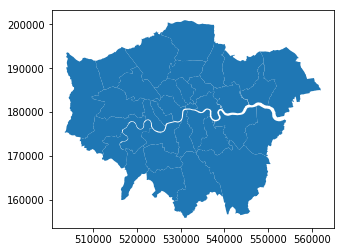

In [151]:
#View London map without any data
map_df.plot()

In [152]:
# Reset "geometry" coordinates to the center of borough geometry (for labels)

map_df["center"] = map_df["geometry"].centroid
map_center = map_df.set_geometry("center")
map_center.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,center
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",POINT (519297.6348074289 166820.0114901623)
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ...",POINT (533290.1539193918 163541.2435742753)
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9...",POINT (542895.5116070557 165655.5213403855)
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ...",POINT (513515.5055361106 175643.2243196642)
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ...",POINT (515887.9377702068 181715.4956169288)


### Merge London geo data and RTA data

In [166]:
merged = map_df.set_index("NAME").join(total_rta.set_index("NAME"))
merged = merged.drop(["City of London"])
merged

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,center,total_rta,rank
NAME,,,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",POINT (519297.6348074289 166820.0114901623),2574.0,31
Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ...",POINT (533290.1539193918 163541.2435742753),6553.0,4
Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9...",POINT (542895.5116070557 165655.5213403855),4205.0,20
Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ...",POINT (513515.5055361106 175643.2243196642),5388.0,11
Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ...",POINT (515887.9377702068 181715.4956169288),6430.0,6
Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((549893.9 181459.8, 549894.6 181465.7...",POINT (554049.0303559566 187392.024989528),3570.0,25
Hillingdon,E09000017,11570.063,0.000,F,None,None,"POLYGON ((510599.8 191689.5, 510615.2 191591.3...",POINT (507889.7386193402 183652.8220923233),5144.0,13
Harrow,E09000015,5046.330,0.000,F,None,None,"POLYGON ((510599.8 191689.5, 510660 191690.9, ...",POINT (514986.7027762709 190066.8431143851),2464.0,32
Brent,E09000005,4323.270,0.000,F,None,None,"POLYGON ((525201 182512.6, 525181.5 182521.1, ...",POINT (520177.8684312018 185829.5161161507),4867.0,16


### Create choropleth map

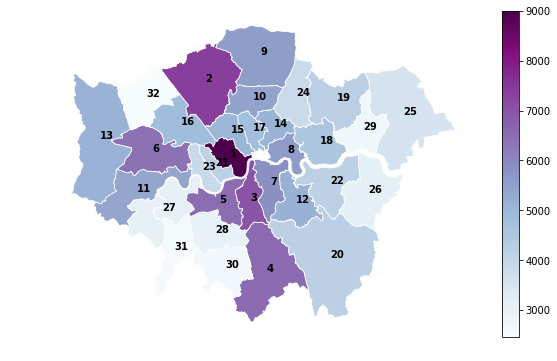

In [170]:
# set the range for the choropleth
vmin = merged["total_rta"].min()
vmax = merged["total_rta"].max()

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

#create map
merged.plot(column="total_rta", cmap="BuPu", linewidth=0.8, ax=ax, edgecolor= "2.0")

# remove the axis
ax.axis("off")

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap="BuPu", norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

#add rank labels
texts = []

for i in range(len(merged)):
    x = merged["center"][i].x
    y = merged["center"][i].y
    label = merged["rank"][i]
    
    texts.append(plt.text(x, y, label, fontsize = 10, fontweight='bold' ))
      